In [1]:
import numpy as np
from posteriors import wishart # The wishart posterior distribution
from simulation import simul_gauss # Simulate a gaussian MMM
from matplotlib import pyplot as plt
%matplotlib inline

# Wishart distribution

In [17]:
omega_start = np.array([np.eye(3)/30, np.eye(3)/30]) # Prior mean for the population cov matrix
nu_start = np.array([100, 100]) # Prior degree of freedom

In [18]:
wish = wishart(nu = nu_start, omega = omega_start, nu0 = nu_start, omega0_inv = np.linalg.inv(omega_start) )

In [19]:
print(wish.params)

{'nu': array([100, 100]), 'omega': array([[[0.03333333, 0.        , 0.        ],
        [0.        , 0.03333333, 0.        ],
        [0.        , 0.        , 0.03333333]],

       [[0.03333333, 0.        , 0.        ],
        [0.        , 0.03333333, 0.        ],
        [0.        , 0.        , 0.03333333]]])}


In [20]:
wish.default

{'nu0': array([100, 100]), 'omega0_inv': array([[[30.,  0.,  0.],
         [ 0., 30.,  0.],
         [ 0.,  0., 30.]],
 
        [[30.,  0.,  0.],
         [ 0., 30.,  0.],
         [ 0.,  0., 30.]]])}

## Let's simulate now a gaussian mixture

Our mixture is made of two gaussian components
* Each component has its own `mean` and `cov matrix`
* The means are assumed to be gaussian
* The covariance matrix are assumed to be distributed as an invert-wishart random variable

In [21]:
# Define the population true parameters
mu1 = np.array([1,1, 1]) # First component's true mean
mu2 = np.array([10,10, 10]) # Second component's true mean
sigma1 = np.array([[1,0, 0], [0,1, 0], [0,0,1]]) # First component's true covariance matrix
sigma2 = np.array([[10,0,0], [0,10,0], [0,0,10]]) # Second component's true covariance matrix

mu = np.array([mu1, mu2]) # List of the two "means"
sigma = np.array([sigma1, sigma2]) # List of the two covariances

### To be able to simulate our Markov Switching Gaussian Mixture, we need to define a transition matrix

In [22]:
P = np.array([ [0.4,0.6],
             [0.8, 0.2]]) # The transition matrix

In [23]:
y, S = simul_gauss(P, mu, sigma, 1000) # Simlate 1000 samples of a 3-D gaussian `Markov Mixed Model`

In [24]:
y[:3], S[:3]

(array([[ 1.43833962e+01,  1.21200536e+01,  9.00144125e+00],
        [ 1.27146157e-01, -6.07960457e-02, -1.28388068e-02],
        [ 1.06665114e+01,  1.11230814e+01,  1.42073478e+01]]),
 array([1, 0, 1]))

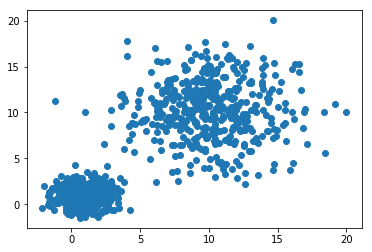

In [25]:
plt.scatter(y[:,0], y[:, 1]) # We can see that our clusters are  clearly distinct

In [26]:
y.mean(0), np.var(y, 0) # Take a look on the sample mean, Is it closer to the 'true' mean ?

(array([4.87644303, 4.94456899, 4.84622733]),
 array([25.068971  , 25.7891939 , 24.64853047]))

## Now, let's update the model, given observations ==> Can we recover the true `covariance matrix `?

In [27]:
Theta = {"mu": mu} # Define here, one sample from the posterior distribution of the 'mean'

In [28]:
wish.update(Y= y,S= S, Theta = Theta)

In [29]:
wish.default["nu0"]

array([100, 100])

In [30]:
wish.params # Updated paramters

{'nu': array([672, 528]),
 'omega': array([[[ 1.47040468e-03, -7.14474976e-05, -8.75496774e-05],
         [-7.14474976e-05,  1.70711640e-03, -1.25640007e-05],
         [-8.75496774e-05, -1.25640007e-05,  1.70125544e-03]],
 
        [[ 2.34415949e-04, -2.16597116e-06,  2.04372745e-05],
         [-2.16597116e-06,  2.21747334e-04, -2.19431098e-05],
         [ 2.04372745e-05, -2.19431098e-05,  2.29851694e-04]]])}

### Below, we can see that we get a pretty good estimate distribution of the cov matrix, from which we cample sample by cally `.rvs`

In [31]:
np.linalg.inv(wish.rvs()).round(2) # A pretty good estimation of the covariance matrix after, only, one update

array([[[ 1.05,  0.05,  0.01],
        [ 0.05,  0.83, -0.01],
        [ 0.01, -0.01,  0.86]],

       [[ 8.39, -0.29, -0.42],
        [-0.29,  8.73,  1.27],
        [-0.42,  1.27,  7.81]]])